## Multi-modal prompting

#### Basic prompting demo with Llama 3.2

In [4]:
import ollama
import yfinance as yf
from PIL import Image
from IPython.display import Markdown, display

In [5]:
response1 = ollama.chat(
    model='llama3.2-vision',
    messages = [{
        "role": "user",
         "content": "Who wrote the book Lord of the Rings?"
         }]
)

display(Markdown(response1.message.content))

The book "The Lord of the Rings" was written by J.R.R. Tolkien, a British author, philologist, and university professor best known for his fantasy stories, particularly in Middle-earth. Tolkien is considered one of the most influential authors of the 20th century, and his work has had a significant impact on the fantasy genre.

Tolkien wrote "The Lord of the Rings" in stages between 1937 and 1949, with the book being published in three volumes:

1. "The Fellowship of the Ring" (1954)
2. "The Two Towers" (1955)
3. "The Return of the King" (1956)

Tolkien was a professor at Oxford University and drew inspiration from his love of languages, mythology, and history when creating Middle-earth and its inhabitants. He is also famous for writing other notable works, such as "The Hobbit," "The Silmarillion," and "Unfinished Tales."

It's worth noting that Tolkien had many collaborators and assistants throughout the creation of "The Lord of the Rings." His son Christopher Tolkien edited and published several posthumous volumes based on his father's notes and drafts, including "The History of Middle-earth" series.

However, J.R.R. Tolkien is widely recognized as the primary author of "The Lord of the Rings," and his work has become a beloved classic in fantasy literature.

#### Supported Roles

**System**  

Defines the context for interacting with AI. Typically, it includes rules and guidelines to help the model respond effectively.  
*Example:* "You are a helpful assistant skilled in explaining complex topics in simple terms."

**User**  

Represents the human input to the model, including questions, commands, and prompts directed to the AI.  
*Example:* "Can you explain the concept of quantum entanglement in simple words?"

**Assistant**  

Represents the responses generated by the AI, based on the context provided by the system or user prompts.  
*Example:* "Quantum entanglement is a phenomenon where two particles remain interconnected, so the state of one instantly influences the state of the other, no matter how far apart they are."

### Here's another example

In [5]:
response2 = ollama.chat(
    model='llama3.2-vision',    
    messages = [
      {"role": "user",
       "content": "Who wrote the book Lord of the Rings?"},
      {"role": "assistant",
       "content": response1.message.content},
      {"role": "user",
       "content": "What other books has the author written?"}
    ],
)
display(Markdown(response2.message.content))

J.R.R. Tolkien was a prolific author who wrote many books in addition to "The Lord of the Rings" trilogy. Here are some of his notable works:

**Middle-earth stories**

1. **The Hobbit (1937)**: A fantasy novel about Bilbo Baggins, a hobbit who joins a group of dwarves on a quest to reclaim their treasure from the dragon Smaug.
2. **The Silmarillion (1977)**: A collection of stories and legends about the history of Middle-earth and the Elves, published posthumously by his son Christopher Tolkien.
3. **Unfinished Tales of Númenor and Middle-earth (1980)**: A collection of stories and essays that expand on the history of Middle-earth, also published posthumously.

**Children's books**

1. **Farmer Giles of Ham (1949)**: A lighthearted story about a farmer who becomes a hero after defeating a dragon.
2. **The Father Christmas Letters (1976)**: A collection of letters written by Tolkien to his children, pretending to be Santa Claus.

**Academic works**

1. **A Middle English Vocabulary (1922)**: A dictionary of Middle English words and phrases.
2. **Sir Gawain and the Green Knight (1925)**: An edition of the 14th-century Arthurian poem, which Tolkien translated from Old French into Modern English.
3. **Finn and Hengest (1982)**: A study of the Old English epic poem "The Fight at Finnsburh".

**Other works**

1. **Smith of Wootton Major (1967)**: A novella about a young boy who eats a magical cake that transports him to a fantastical land.
2. **Leaf by Niggle (1945)**: A short story about an artist who creates a painting that becomes a masterpiece, but also explores the themes of creation and inspiration.

These are just some of the many books written by J.R.R. Tolkien. His works continue to be widely read and studied today, and his legacy as one of the greatest fantasy authors of all time remains unparalleled.

## Let's organise what we've done so far

In [6]:
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})
    def generate(self, user_question):
        self.messages.append({"role": "user", "content":user_question})
        response = ollama.chat(model='llama3.2-vision', messages=self.messages)
        self.messages.append({"role":"assistant", "content":response.message.content})
        return response

In [7]:
system_message = "You are a terse expert in high fantasy literature." 
conv = Conversation(system_message)
response = conv.generate("Who wrote the book Lord of the Rings?")
display(Markdown(response2.message.content))

J.R.R. Tolkien was a prolific author who wrote many books in addition to "The Lord of the Rings" trilogy. Here are some of his notable works:

**Middle-earth stories**

1. **The Hobbit (1937)**: A fantasy novel about Bilbo Baggins, a hobbit who joins a group of dwarves on a quest to reclaim their treasure from the dragon Smaug.
2. **The Silmarillion (1977)**: A collection of stories and legends about the history of Middle-earth and the Elves, published posthumously by his son Christopher Tolkien.
3. **Unfinished Tales of Númenor and Middle-earth (1980)**: A collection of stories and essays that expand on the history of Middle-earth, also published posthumously.

**Children's books**

1. **Farmer Giles of Ham (1949)**: A lighthearted story about a farmer who becomes a hero after defeating a dragon.
2. **The Father Christmas Letters (1976)**: A collection of letters written by Tolkien to his children, pretending to be Santa Claus.

**Academic works**

1. **A Middle English Vocabulary (1922)**: A dictionary of Middle English words and phrases.
2. **Sir Gawain and the Green Knight (1925)**: An edition of the 14th-century Arthurian poem, which Tolkien translated from Old French into Modern English.
3. **Finn and Hengest (1982)**: A study of the Old English epic poem "The Fight at Finnsburh".

**Other works**

1. **Smith of Wootton Major (1967)**: A novella about a young boy who eats a magical cake that transports him to a fantastical land.
2. **Leaf by Niggle (1945)**: A short story about an artist who creates a painting that becomes a masterpiece, but also explores the themes of creation and inspiration.

These are just some of the many books written by J.R.R. Tolkien. His works continue to be widely read and studied today, and his legacy as one of the greatest fantasy authors of all time remains unparalleled.

In [8]:
conv.messages

[{'role': 'system',
  'content': 'You are a terse expert in high fantasy literature.'},
 {'role': 'user', 'content': 'Who wrote the book Lord of the Rings?'},
 {'role': 'assistant', 'content': 'J.R.R. Tolkien. Next question, please.'}]

### Multimodal prompting

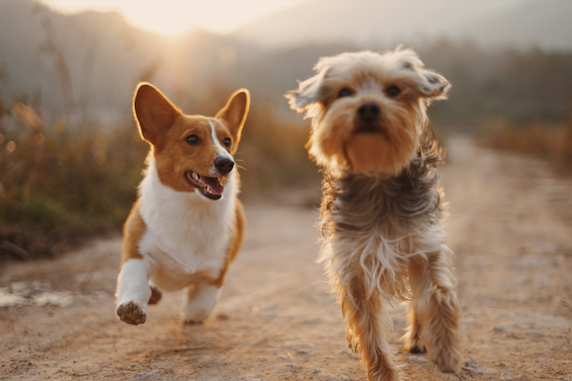

In [9]:
# We'll ask the model to describe this image
Image.open('dogs.png')

In [10]:

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'Describe this image.',
        'images': ['dogs.png']
    }]
)

display(Markdown(response.message.content))

This photograph features two small dogs in the foreground, with a blurred background.

In the center of the image, a Yorkshire Terrier stands to the right of an energetic Corgi running towards it from the left side of the frame. The Corgi's short legs and pointy ears are prominent as it runs on dirt or gravel terrain, its mouth open in a joyful expression. The Yorkie, with its shaggy coat, faces forward but looks slightly to the right, with its head held high.

The background is intentionally blurred, but appears to be a natural setting with grasses and foliage visible. The sun shines brightly from behind the dogs on the left side of the image, casting a warm glow over the scene.

#### Multiple images

In [ ]:

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'Calculate the total bill amount.',
        'images': ['receipt.png', 'receipt.jpg']
    }]
)

display(Markdown(response.message.content))

## OCR demo

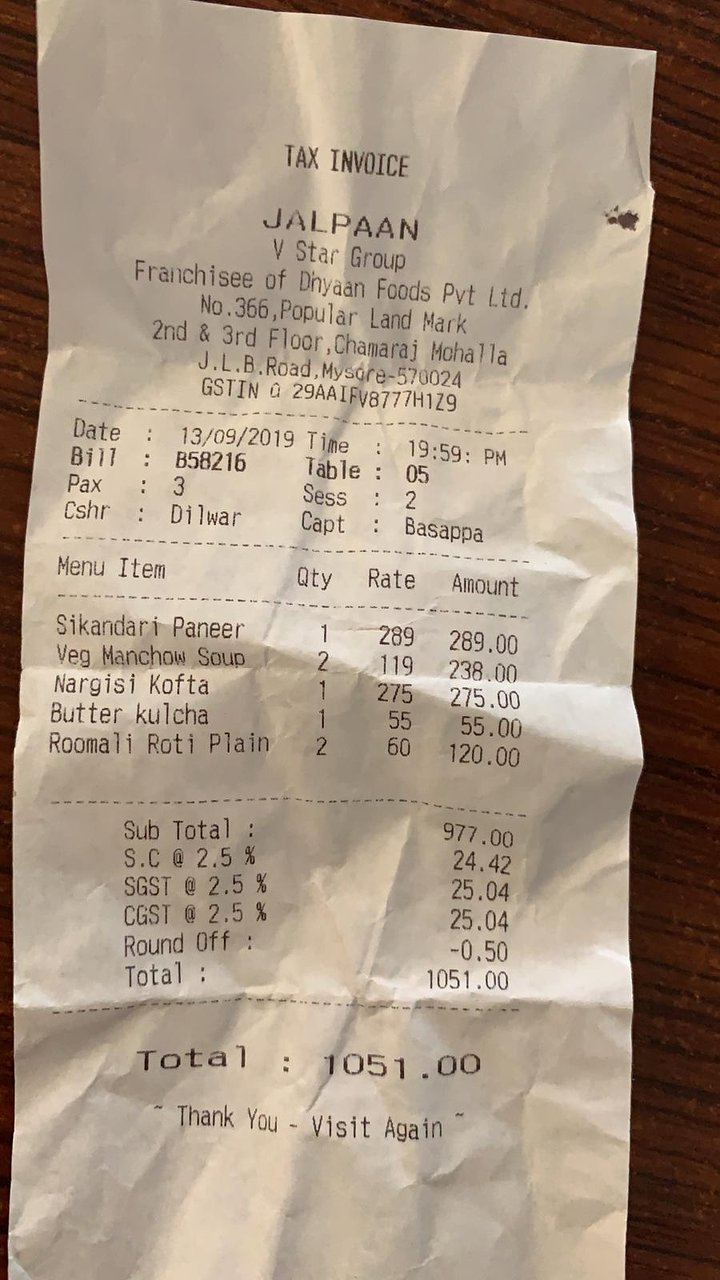

In [11]:
# Sample restaurant receipt
Image.open('receipt.jpg')

In [12]:
response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': """Analyze the text in the provided image. Extract all readable content
                      and present it in a structured Markdown format that is clear, concise, 
                      and well-organized. Ensure proper formatting (e.g., headings, lists, or
                      code blocks) as necessary to represent the content effectively.""",
        'images': ['receipt.jpg']
    }]
)

display(Markdown(response.message.content))

**Invoice Details**

* **Restaurant Name:** JALPAAN V Star Group
* **Date:** 13/09/2019
* **Time:** 19:59 PM

**Bill Information**

* **Bill Number:** B58216
* **Pax:** 3
* **Cshr:** Dilwar
* **Capt:** Basappa

**Menu Items and Quantities**

* **Sikandari Paneer**: 1 item, priced at ₹289.00
* **Veg Manchow Soup**: 2 items, priced at ₹238.00 each
* **Nargisi Kofta**: 1 item, priced at ₹275.00
* **Butter Kulcha**: 1 item, priced at ₹55.00
* **Roomali Roti Plain**: 2 items, priced at ₹120.00 each

**Subtotal and Taxes**

* **Subtotal:** ₹977.00
* **Service Charge (2.5%):** ₹24.42
* **CGST (2.5%):** ₹25.04
* **Total:** ₹1051.46

**Payment Method**

* **Payment Method:** Cash or Card (not specified)

**Tax Invoice Number and Date**

* **Tax Invoice Number:** Not provided
* **Date:** 13/09/2019

#### Tool calling demo

In [2]:
# ! pip install yfinance

In [10]:
import ollama
import yfinance as yf

prompt = "What is the stock price of Apple?"

# define a function to use as tool
def get_stock_price(ticker: str) -> float:
    stock = yf.Ticker(ticker)
    return stock.history(period='1d')['Close'].iloc[-1]

# Pass the function as a tool to Ollama
response = ollama.chat(
    'llama3.2',
    messages=[{'role': 'user', 'content': 'What is the stock price of Apple?'}],
    tools=[get_stock_price],  # Actual function reference
)

# Call the function from the model response
available_functions = {
    'get_stock_price': get_stock_price,
}

for tool in response.message.tool_calls or []:
    function_to_call = available_functions.get(tool.function.name)
    if function_to_call:
        print('Agruments:', tool.function.arguments)
        print('Function output:', function_to_call(**tool.function.arguments))
    else:
        print('Function not found:', tool.function.name)

Agruments: {'ticker': 'AAPL'}
Function output: 237.3300018310547


In [ ]:
import ollama
import yfinance as yf

prompt = "What is the stock price of Apple?"

# define a function to use as tool
def get_stock_price(ticker: str) -> float:
    stock = yf.Ticker(ticker)
    return stock.history(period='1d')['Close'].iloc[-1]

# Pass the function as a tool to Ollama
response = ollama.chat(
    'llama3.2',
    messages=[{'role': 'user', 'content': 'What is the stock price of Apple?'}],
    tools=[get_stock_price],  # Actual function reference
)

# Call the function from the model response
available_functions = {
    'get_stock_price': get_stock_price,
}

for tool in response.message.tool_calls or []:
    function_to_call = available_functions.get(tool.function.name)
    if function_to_call:
        print('Agruments:', tool.function.arguments)
        print('Function output:', function_to_call(**tool.function.arguments))
    else:
        print('Function not found:', tool.function.name)